## **Attributes Information:**
- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira).

- sex - student's sex (binary: 'F' - female or 'M' - male).

- age - student's age (numeric: from 15 to 22).

- address - student's home address type (binary: 'U' - urban or 'R' - rural).

- famsize - family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3).

- Pstatus- parent's cohabitation status (binary: 'T' - living together or 'A' - apart).

- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education).

- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education).

- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other').

- Fjob- father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other').

- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other').

- guardian - student's guardian (nominal: 'mother', 'father' or 'other').

- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour).

- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours).

- failures - number of past class failures (numeric: n if 0 <= n < 3, else 3).

- schoolsup - extra educational support (binary: yes or no).

- famsup - family educational support (binary: yes or no).

- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no).

- activities - extra-curricular activities (binary: yes or no).

- nursery - attended nursery school (binary: yes or no).

- higher - wants to take higher education (binary: yes or no).

- internet - Internet access at home (binary: yes or no).

- romantic - with a romantic relationship (binary: yes or no).

- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent).

- freetime - free time after school (numeric: from 1 - very low to 5 - very high).

- goout - going out with friends (numeric: from 1 - very low to 5 - very high).

- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high).

- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high).

- health - current health status (numeric: from 1 - very bad to 5 - very good).

- absences - number of school absences (numeric: from 0 to 93).

**Grades which are related with the course subject:**
- G1 - first period grade (numeric: from 0 to 20).
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, Output Target)



### Data loading

In [9]:
!pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
X = pd.DataFrame(X)
y= pd.DataFrame(y)

In [13]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [14]:
y.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


### EDA

In [15]:
y['G1'].unique()

array([ 0,  9, 12, 14, 11, 13, 10, 15, 17,  8, 16, 18,  7,  6,  5,  4, 19])

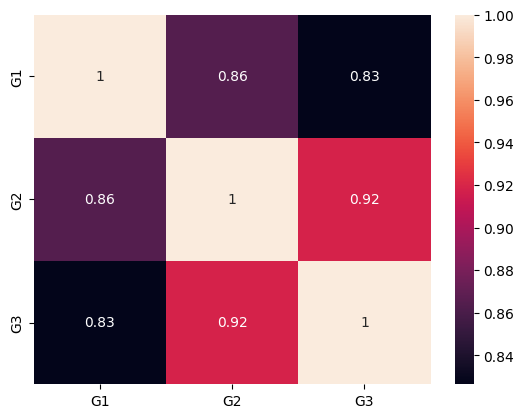

In [16]:
sns.heatmap(y.corr(),annot= True)
plt.show()

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [18]:
X.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000


In [19]:
X['school'].unique()

array(['GP', 'MS'], dtype=object)

<Axes: xlabel='school'>

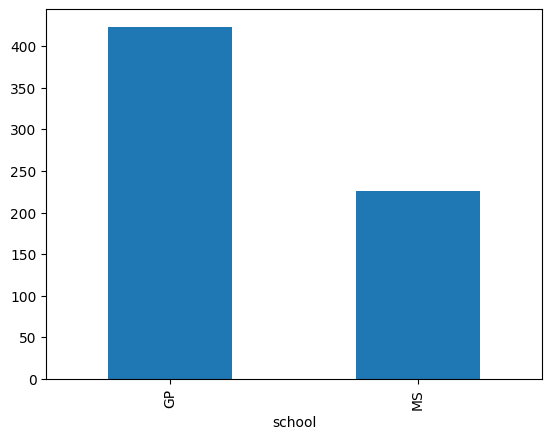

In [20]:
X['school'].value_counts().plot(kind = "bar")


<Axes: xlabel='sex'>

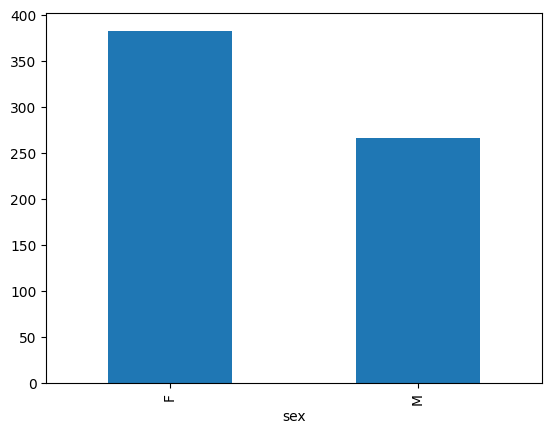

In [21]:

X['sex'].value_counts().plot(kind = "bar")

In [22]:
filter = X[(X['sex']=='F')& (X['school']=='GP')]
print(filter)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
415     GP   F   19       U     GT3       T     4     4   teacher     other   
417     GP   F   18       U     GT3       T     3     2   at_home     other   
420     GP   F   18       U     LE3       A     2     2  services     other   
421     GP   F   20       U     GT3       T     1     0     other     other   
422     GP   F   18       U     GT3       T     3     2  services     other   

     ... higher internet  romantic  famrel  freetim

<Axes: >

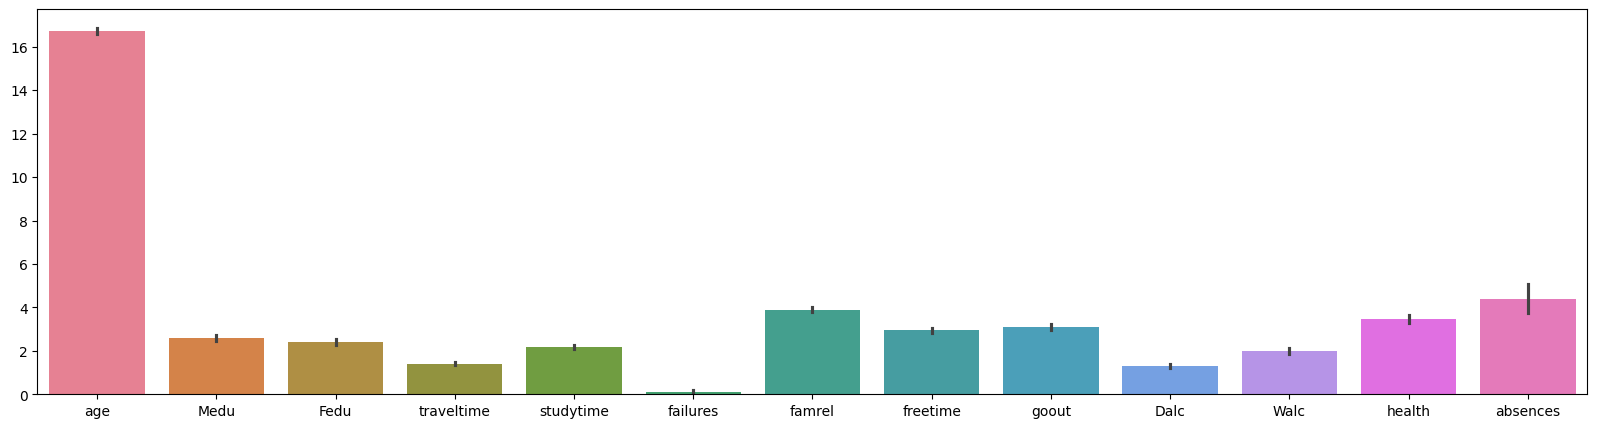

In [23]:
plt.subplots(figsize = (20,5))
sns.barplot(filter)

In [24]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

<Axes: xlabel='G1', ylabel='G2'>

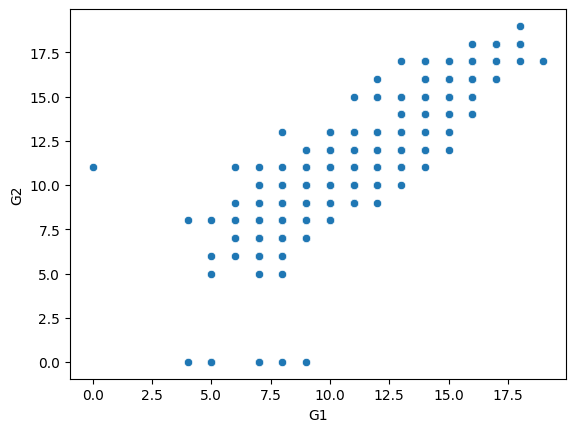

In [25]:
sns.scatterplot(x= 'G1', y= 'G2',data = y )

In [26]:
data = X.copy()
data = pd.concat([data, y], axis=1)


In [27]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


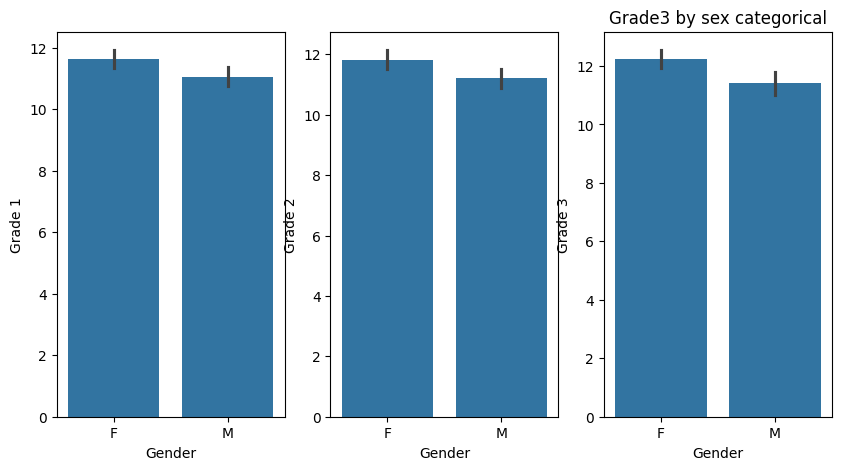

In [28]:
fig,ax = plt.subplots(1,3,figsize = (10,5))

sns.barplot(x = 'sex', y = 'G1', data = data,ax= ax[0])
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Grade 1")
plt.title("Grade1 by sex categorical")

sns.barplot(x = 'sex', y = 'G2', data = data,ax= ax[1])
ax[1].set_xlabel("Gender")
ax[1].set_ylabel("Grade 2")
plt.title("Grade2 by sex categorical")

sns.barplot(x = 'sex', y = 'G3', data = data,ax= ax[2])
ax[2].set_xlabel("Gender")
ax[2].set_ylabel("Grade 3")
plt.title("Grade3 by sex categorical")

plt.show()


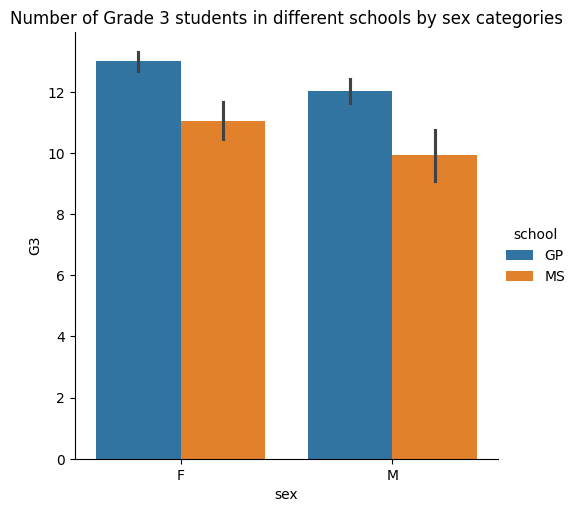

In [29]:
sns.catplot(x= 'sex', y ='G3',hue = 'school',data = data,kind = 'bar')
plt.title("Number of Grade 3 students in different schools by sex categories")
plt.show()

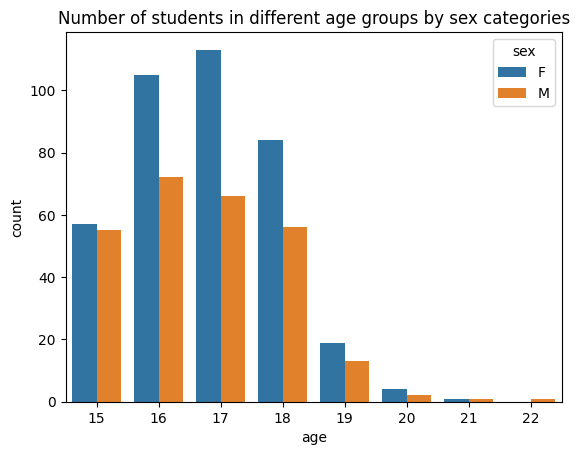

In [30]:
sns.countplot(x= 'age', hue = 'sex',data = data )
plt.title("Number of students in different age groups by sex categories")
plt.show()

In [31]:
X['failures'].unique()

array([0, 3, 1, 2])

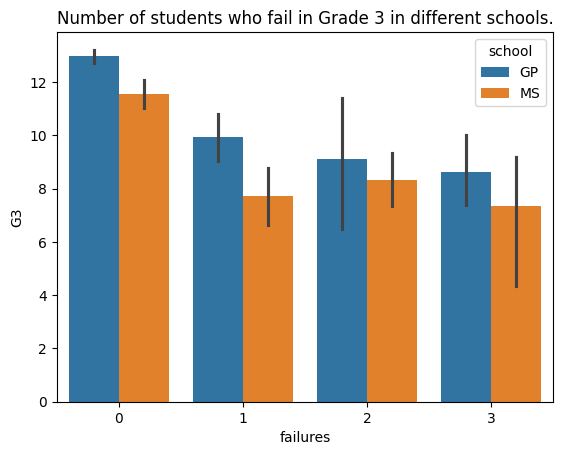

In [32]:
sns.barplot(x ='failures',y = 'G3',hue = 'school',data = data )
plt.title("Number of students who fail in Grade 3 in different schools.")
plt.show()

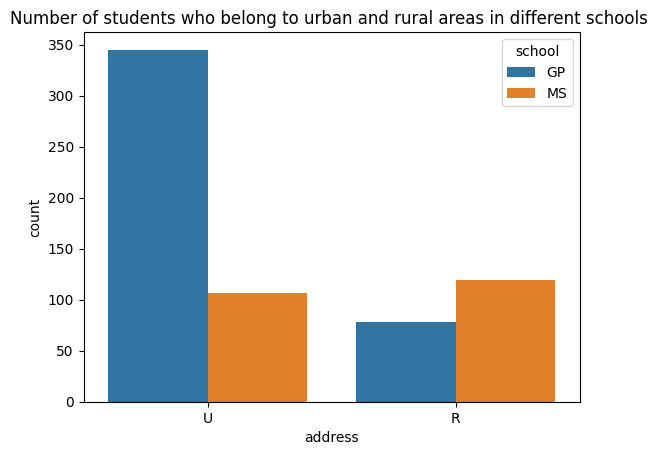

In [33]:
sns.countplot(x = "address",hue = 'school',data = data )
plt.title("Number of students who belong to urban and rural areas in different schools ")
plt.show()

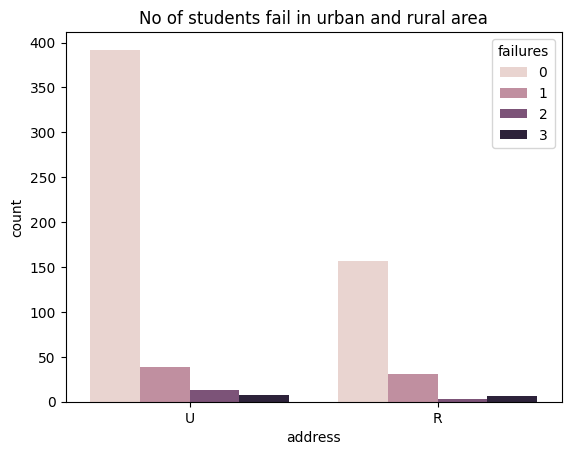

In [34]:
sns.countplot(x = "address",hue = 'failures',data = data )
plt.title("No of students fail in urban and rural area")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.4% of the points cannot be place

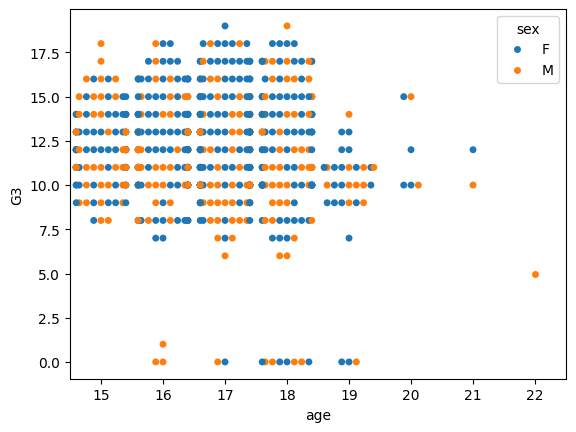

In [35]:
sns.swarmplot(x='age', y='G3',hue='sex', data=data)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


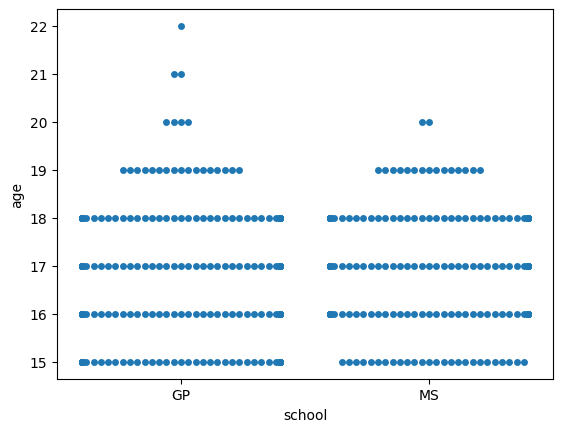

In [36]:
sns.swarmplot(x= 'school',y = 'age',data = data)
plt.show()

In [37]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

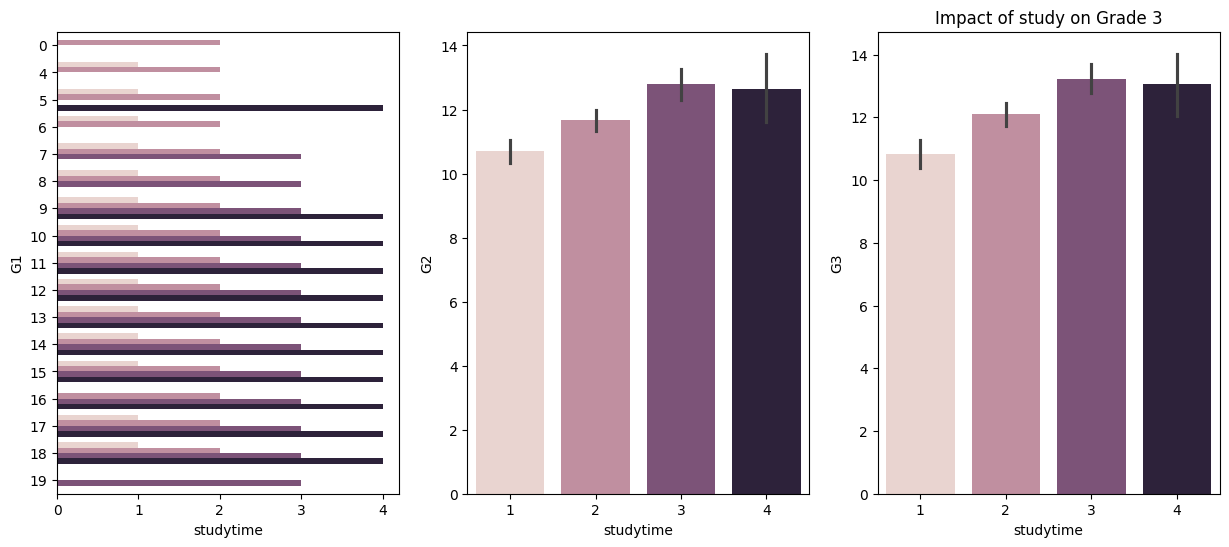

In [38]:
fig,ax = plt.subplots(1,3,figsize= (15,6))

sns.barplot(x= 'studytime',y = 'G1',data= data,ax =ax[0],hue = 'studytime',legend=False,orient ='h')
plt.title("Impact of study on Grade 1")

sns.barplot(x= 'studytime',y = 'G2',data= data,ax =ax[1],hue = 'studytime',legend=False)
plt.title("Impact of study on Grade 2")

sns.barplot(x= 'studytime',y = 'G3',data= data,ax =ax[2],hue = 'studytime',legend=False)
plt.title("Impact of study on Grade 3")
plt.show()


In [39]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_columns:
  data[col] = le.fit_transform(data[col])


<Axes: >

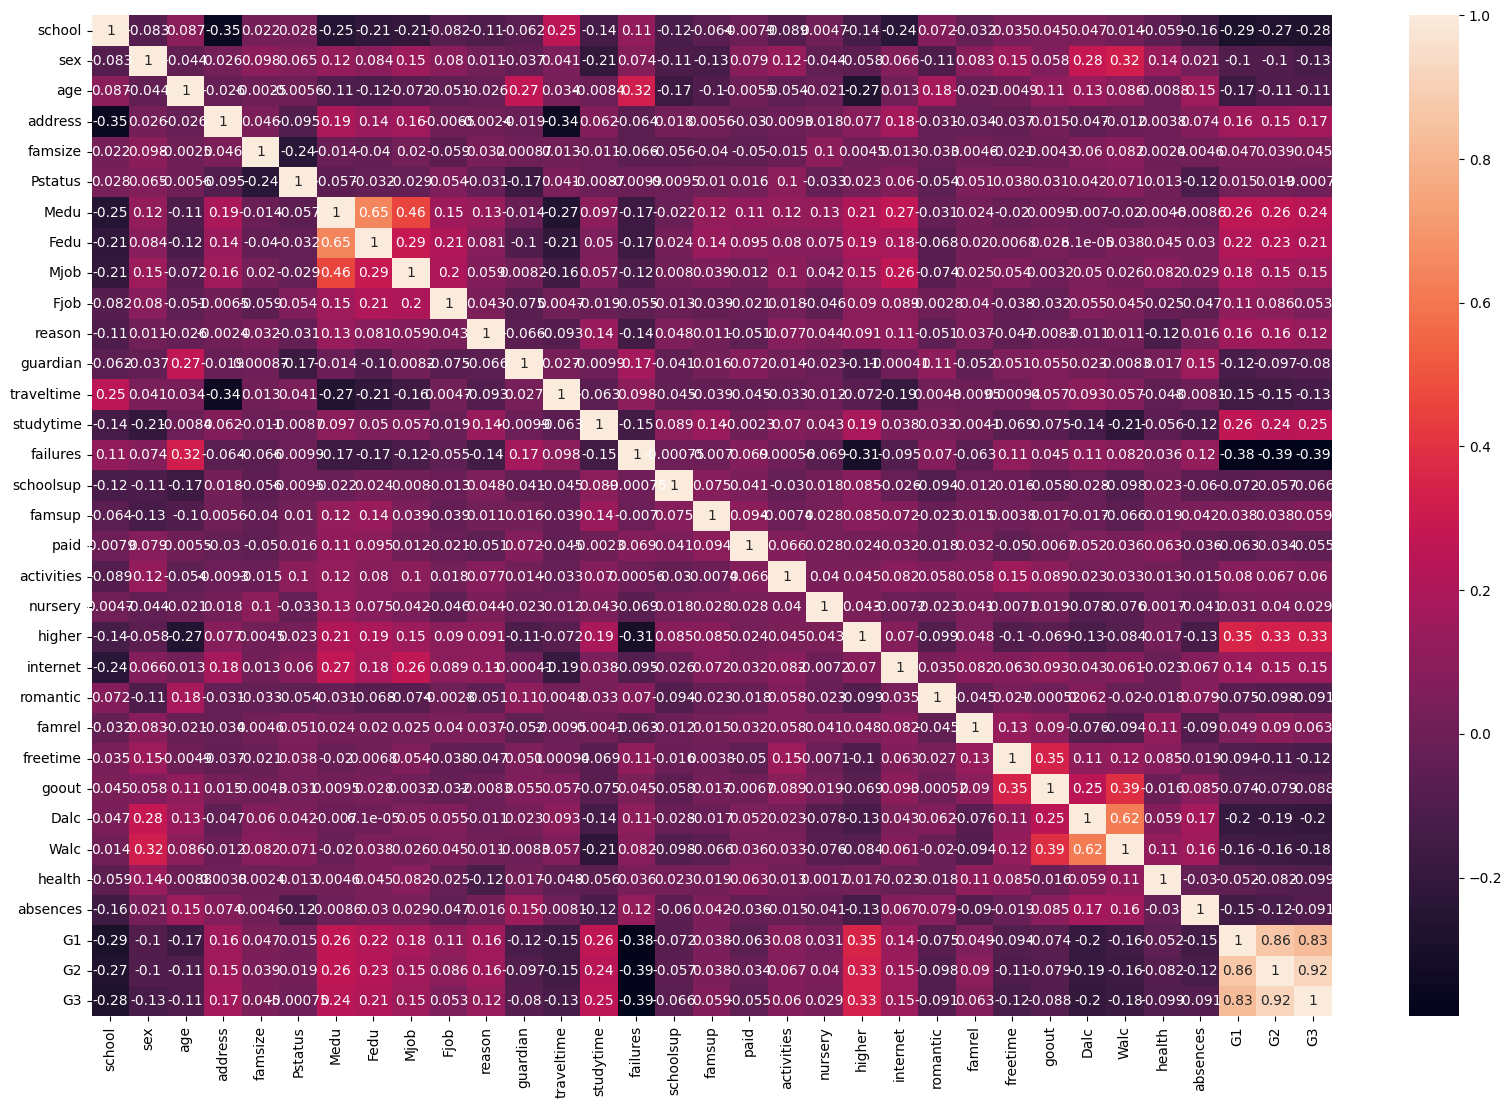

In [41]:
plt.figure(figsize =(20,13))
sns.heatmap(data.corr(),annot = True,cbar = True)

In [42]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


### Feature Selection

In [43]:
data['G3'].unique()

array([11, 12, 14, 13, 17, 15,  7, 10, 16,  9,  8, 18,  6,  0,  1,  5, 19])

<Axes: >

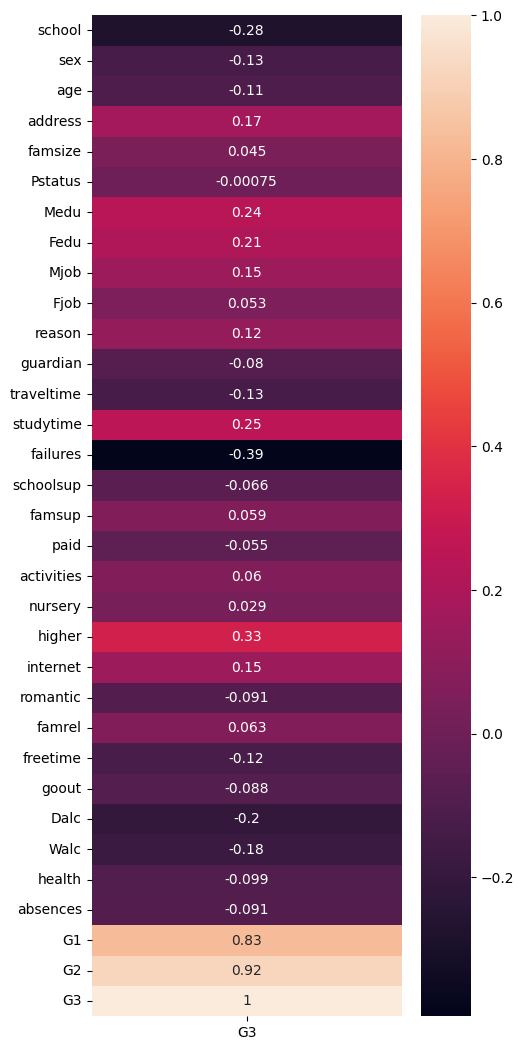

In [44]:
correlation_matrix = data.corr()

correlation_with_g3 = correlation_matrix['G3']

plt.figure(figsize=(5,13))
sns.heatmap(correlation_with_g3.to_frame(),annot = True , cbar = True)

In [45]:
Threshold  = 0.13

In [46]:
G3_corr = data.corr()['G3']

In [47]:
data_after_drop_feature = data.copy()

In [48]:
for key, value in G3_corr.items():
  if abs(value) < Threshold:
    data_after_drop_feature.drop(columns = key,inplace = True)



In [49]:
data_after_drop_feature

,school,address,Medu,Fedu,Mjob,studytime,failures,higher,internet,Dalc,Walc,G1,G2,G3
0,0,1,4,4,0,2,0,1,0,1,1,0,11,11
1,0,1,1,1,0,2,0,1,1,1,1,9,11,11
2,0,1,1,1,0,2,0,1,1,2,3,12,13,12
3,0,1,4,2,1,3,0,1,1,1,1,14,14,14
4,0,1,3,3,2,2,0,1,0,1,2,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,2,3,3,3,1,1,1,1,2,10,11,10
645,1,1,3,1,4,2,0,1,1,1,1,15,15,16
646,1,1,1,1,2,2,0,1,0,1,1,11,12,9
647,1,1,3,1,3,1,0,1,1,3,4,10,10,10


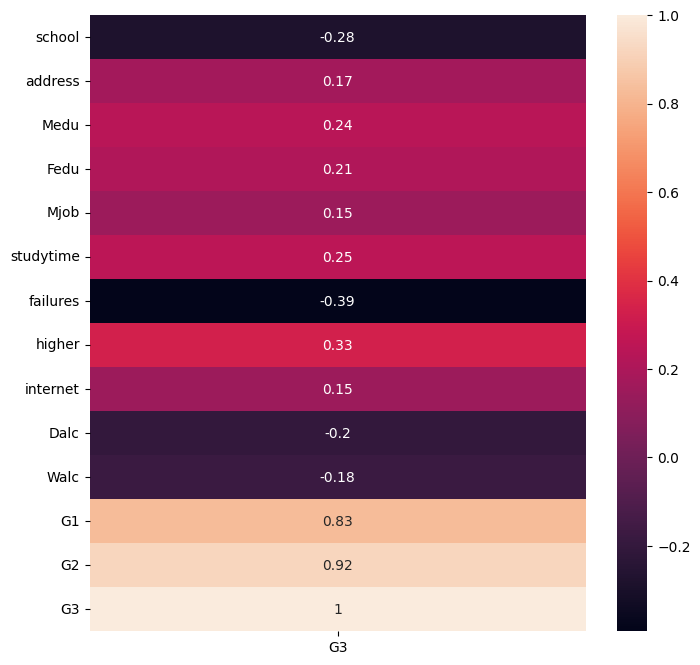

In [50]:
correlation_matrix = data_after_drop_feature.corr()

correlation_matrix_with_G3 = correlation_matrix['G3']
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix_with_G3.to_frame(),annot = True,cbar = True)
plt.show()

In [51]:
data_after_drop_feature.head()

,school,address,Medu,Fedu,Mjob,studytime,failures,higher,internet,Dalc,Walc,G1,G2,G3
0,0,1,4,4,0,2,0,1,0,1,1,0,11,11
1,0,1,1,1,0,2,0,1,1,1,1,9,11,11
2,0,1,1,1,0,2,0,1,1,2,3,12,13,12
3,0,1,4,2,1,3,0,1,1,1,1,14,14,14
4,0,1,3,3,2,2,0,1,0,1,2,11,13,13


In [52]:
X = data_after_drop_feature.drop(columns = 'G3',axis = 1)
y = data_after_drop_feature['G3']

### Data spliting

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size= 0.2, random_state= 42)

In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = pd.DataFrame(ss.fit_transform(X_train))
X_test = pd.DataFrame(ss.fit_transform(X_test))

In [55]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.422412,0.618853,1.167748,1.364092,1.510456,-0.052176,-0.343984,0.318896,0.475831,-0.594017,1.465248,1.706513,1.994898
1,-0.703031,0.618853,0.324375,-1.231010,0.715479,-0.052176,-0.343984,0.318896,0.475831,0.836023,-0.213010,-0.341303,-0.338466
2,1.422412,0.618853,1.167748,1.364092,1.510456,-0.052176,-0.343984,0.318896,0.475831,-0.594017,-0.213010,2.047816,1.994898
3,1.422412,-1.615893,1.167748,1.364092,-1.669452,-0.052176,-0.343984,0.318896,-2.101587,-0.594017,0.626119,-0.682605,-0.338466
4,-0.703031,-1.615893,-1.362373,-1.231010,-0.079498,-0.052176,-0.343984,0.318896,0.475831,0.836023,1.465248,0.341303,-0.338466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.422412,0.618853,0.324375,-0.365976,0.715479,-1.182653,-0.343984,0.318896,0.475831,-0.594017,1.465248,-1.706513,-2.005155
126,-0.703031,0.618853,0.324375,-1.231010,0.715479,1.078302,-0.343984,0.318896,0.475831,0.836023,0.626119,1.706513,1.994898
127,1.422412,-1.615893,0.324375,1.364092,-0.079498,-0.052176,-0.343984,0.318896,-2.101587,-0.594017,-0.213010,-1.023908,-0.671804
128,-0.703031,0.618853,1.167748,0.499058,-0.874475,-0.052176,-0.343984,0.318896,0.475831,-0.594017,-0.213010,0.682605,-0.005128


In [56]:
X_train.shape

(519, 13)

In [57]:
y_train.shape

(519,)

In [58]:
X_test.shape

(130, 13)

### **Model buiding**

In [59]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    confusion_matrix
)

In [60]:
from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor,
                              BaggingRegressor,
                              GradientBoostingClassifier,
                              RandomForestClassifier)


from sklearn.linear_model import (LinearRegression,
                                  Ridge,
                                  Lasso,
                                  LogisticRegression,
                                  BayesianRidge,
                                  SGDClassifier)


from sklearn.naive_bayes import (MultinomialNB,
                                 BernoulliNB,
                                 GaussianNB)

from sklearn.tree import (DecisionTreeClassifier,
                          DecisionTreeRegressor)

### Regression

In [61]:

gbr = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,loss= 'squared_error')
gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error of GradientBoostingRegressor: {mse}')
print(f'R2 score GradientBoostingRegressor: {r2_score(y_pred,y_test)}')
print(f'mean_absolute_error GradientBoostingRegressor: {mean_absolute_error(y_test, y_pred)}')


Mean Squared Error of GradientBoostingRegressor: 2.522813978529744
R2 score GradientBoostingRegressor: 0.72241972673854
mean_absolute_error GradientBoostingRegressor: 1.105704227013019


In [62]:
rd = Ridge(alpha = 1)
rd.fit(X_train,y_train)

y_pred = rd.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error of Ridge: {mse}')
print(f'R2 score Ridge: {r2_score(y_pred,y_test)}')
print(f'mean_absolute_error Ridge: {mean_absolute_error(y_test, y_pred)}')


Mean Squared Error of Ridge: 1.6778144355358011
R2 score Ridge: 0.8094171797785432
mean_absolute_error Ridge: 0.8844349942735197


In [76]:
ls = Lasso(alpha = 0.03)
ls.fit(X_train,y_train)

y_pred = ls.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error of Lasso: {mse}')
print(f'R2 score Lasso: {r2_score(y_pred,y_test)}')
print(f'mean_absolute_error Lasso: {mean_absolute_error(y_test, y_pred)}')


Mean Squared Error of Lasso: 1.642523469549997
R2 score Lasso: 0.8103415160491736
mean_absolute_error Lasso: 0.8702655989423295


In [64]:

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error of Linear_regression: {mse}')
print(f'R2 score Linear_regression: {r2_score(y_pred,y_test)}')
print(f'mean_absolute_error Linear_regression: {mean_absolute_error(y_test, y_pred)}')


Mean Squared Error of Linear_regression: 1.6769397505201429
R2 score Linear_regression: 0.8100448469353582
mean_absolute_error Linear_regression: 0.8832733512040617


In [65]:

by = BayesianRidge()
by.fit(X_train,y_train)

y_pred = by.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error of BayesianRidge: {mse}')
print(f'R2 score BayesianRidge: {r2_score(y_pred,y_test)}')
print(f'mean_absolute_error BayesianRidge: {mean_absolute_error(y_test, y_pred)}')


Mean Squared Error of BayesianRidge: 1.6800265637522873
R2 score BayesianRidge: 0.8079424752532027
mean_absolute_error BayesianRidge: 0.8872243670858387


In [66]:
rfr = RandomForestRegressor(max_depth=8, n_estimators= 400, bootstrap= True )

rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=400)

In [67]:
y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(r2_score(y_pred,y_test))

Mean Squared Error: 2.88774290434751
0.6735882370567897


In [77]:
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier

ad  = AdaBoostRegressor(n_estimators= 200,learning_rate=0.1,loss = 'linear')
ad.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=200)

In [69]:
from sklearn.metrics import mean_squared_error
y_pred = ad.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.620521800651594


In [70]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.6933028384246813


### Classification

In [72]:

X = data_after_drop_feature.drop(columns = 'G3',axis = 1)
y = data_after_drop_feature['G3'].apply(lambda x:  'pass' if x>=10 else 'fail' )

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
def models_eva(models,X_train,X_test,y_train,y_test):
  for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_pred,y_test)
    print(f"accuracy score {model}: ",acc)



In [101]:
m1 = LogisticRegression()
m2 = DecisionTreeClassifier(max_depth=7)
m3 = RandomForestClassifier(n_estimators=200,max_depth=7,bootstrap = True,random_state=42,oob_score= True)
m4 = AdaBoostClassifier(n_estimators=70,learning_rate=0.1,random_state=4)
m5 = GradientBoostingClassifier(n_estimators=250,learning_rate = 0.01,max_depth=10)
m6 = SGDClassifier(penalty='l2',alpha=0.0001,max_iter=100)

models = [m1,m2,m3,m4,m5,m6]

In [102]:

models_eva(models,X_train,X_test,y_train,y_test)

accuracy score LogisticRegression():  0.9230769230769231
accuracy score DecisionTreeClassifier(max_depth=7):  0.9153846153846154
accuracy score RandomForestClassifier(max_depth=7, n_estimators=200, oob_score=True,
                       random_state=42):  0.9307692307692308
accuracy score AdaBoostClassifier(learning_rate=0.1, n_estimators=70, random_state=4):  0.9230769230769231
accuracy score GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=250):  0.9153846153846154
accuracy score SGDClassifier(max_iter=100):  0.9230769230769231


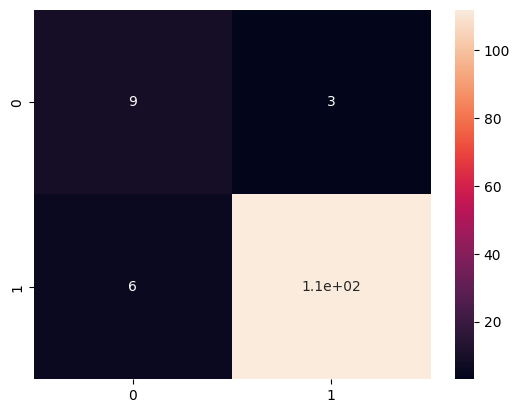

In [106]:
m3 = RandomForestClassifier(n_estimators=200,max_depth=7,bootstrap = True,random_state=42,oob_score= True)
m3.fit(X_train,y_train)

y_pred = m3.predict(X_test)
cofusion__martix = confusion_matrix(y_pred,y_test)

sns.heatmap(cofusion__martix,annot = True,cbar = True)
plt.show()

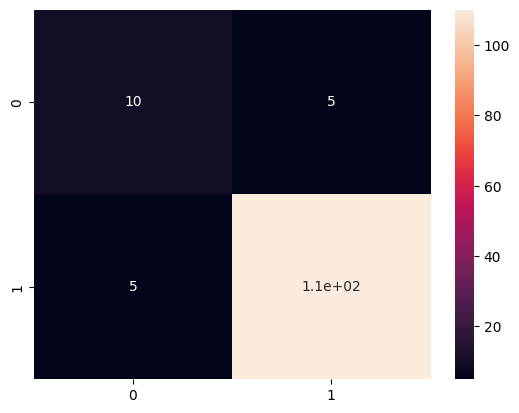

In [107]:
m4 = AdaBoostClassifier(n_estimators=70,learning_rate=0.1,random_state=4)
m4.fit(X_train,y_train)

y_pred = m4.predict(X_test)
cofusion__martix = confusion_matrix(y_pred,y_test)

sns.heatmap(cofusion__martix,annot = True,cbar = True)
plt.show()

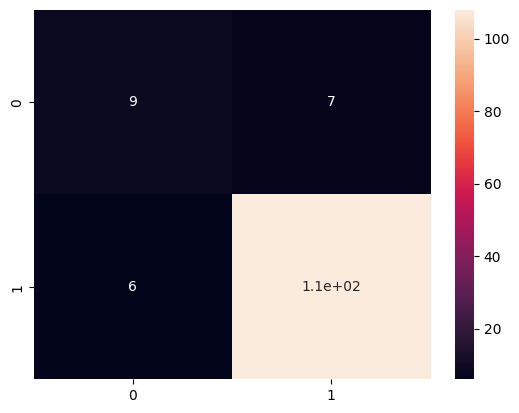

In [108]:
m6 = SGDClassifier(penalty='l2',alpha=0.0001,max_iter=100)
m6.fit(X_train,y_train)

y_pred = m6.predict(X_test)
cofusion__martix = confusion_matrix(y_pred,y_test)

sns.heatmap(cofusion__martix,annot = True,cbar = True)
plt.show()